In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
# read the uploaded CSV file
data = pd.read_csv("creditcard.csv")

# quick look at the first few rows
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# dataset shape
print("Shape:", data.shape)

Shape: (284807, 31)


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
# statistical summary
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


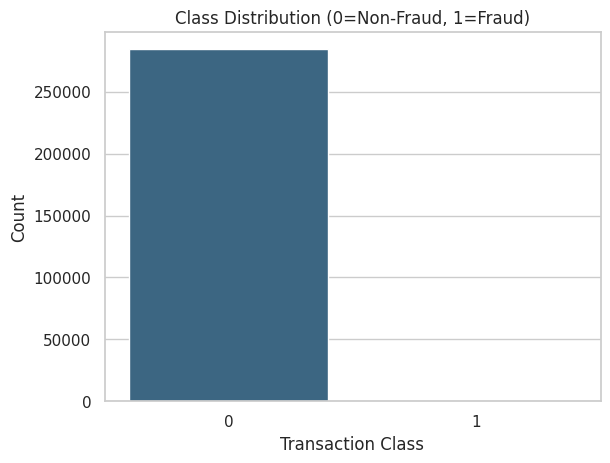

In [8]:
counts = data["Class"].value_counts()
sns.barplot(x=counts.index, y=counts.values, palette="viridis")
plt.title("Class Distribution (0=Non-Fraud, 1=Fraud)")
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.show()

Top correlated features with fraud:
 Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64


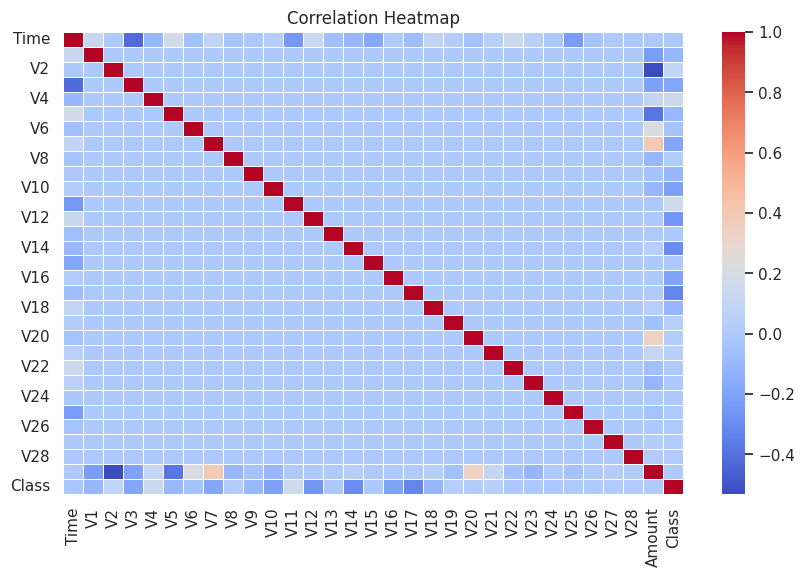

In [9]:
corr = data.corr()["Class"].sort_values(ascending=False)
print("Top correlated features with fraud:\n", corr.head(10))

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

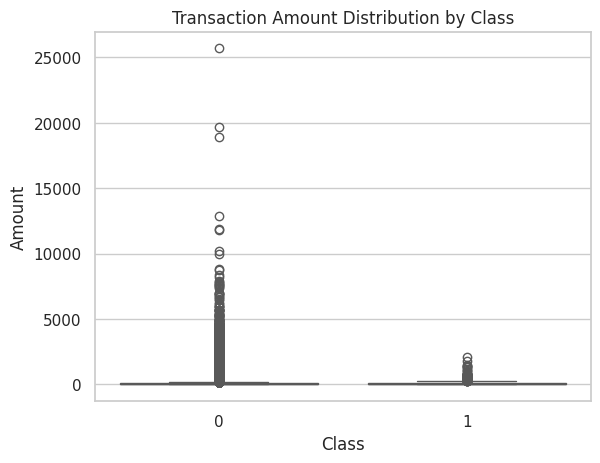

In [10]:
# Transaction amount by class
sns.boxplot(x="Class", y="Amount", data=data, palette="Set2")
plt.title("Transaction Amount Distribution by Class")
plt.show()

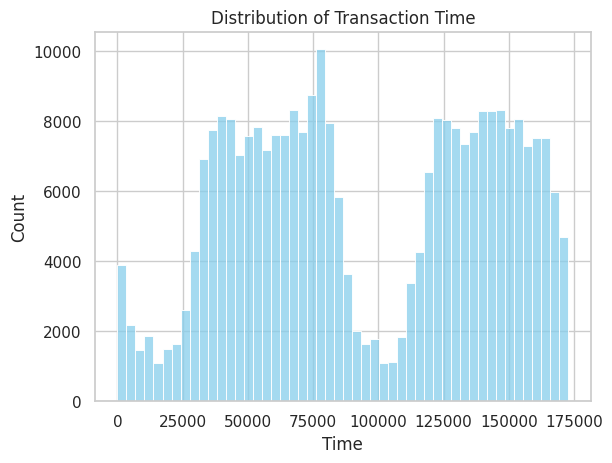

In [11]:
# Distribution of transaction time
sns.histplot(data["Time"], bins=50, color="skyblue")
plt.title("Distribution of Transaction Time")
plt.show()

# Distribution of Transaction Amounts (Log Scale)

> Add blockquote



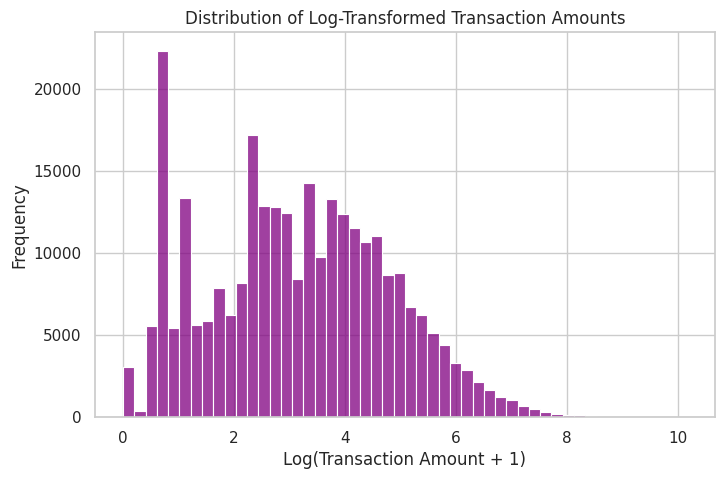

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(data['Amount']), bins=50, color='purple')
plt.title("Distribution of Log-Transformed Transaction Amounts")
plt.xlabel("Log(Transaction Amount + 1)")
plt.ylabel("Frequency")
plt.show()

# Compare Time vs. Amount by Class

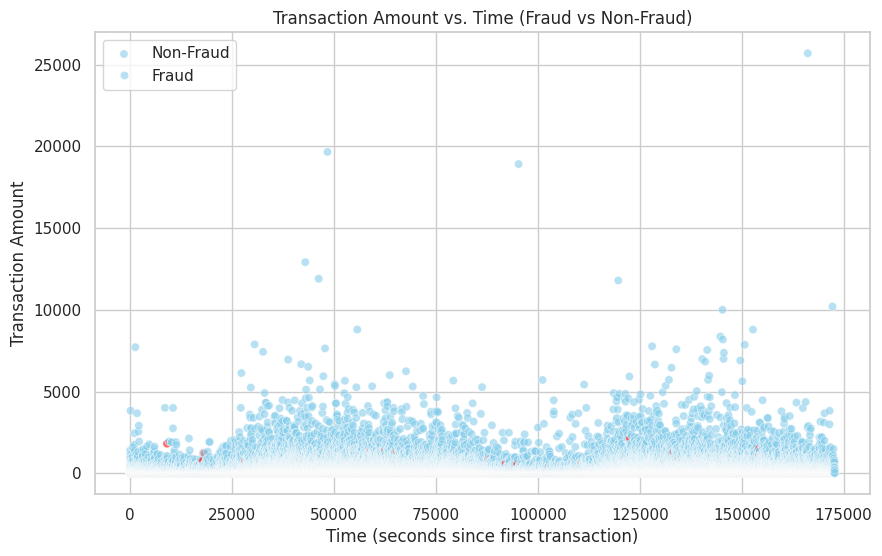

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=data, alpha=0.6, palette={0:'skyblue', 1:'red'})
plt.title("Transaction Amount vs. Time (Fraud vs Non-Fraud)")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Transaction Amount")
plt.legend(["Non-Fraud", "Fraud"])
plt.show()

# Pairplot of Selected Principal Components

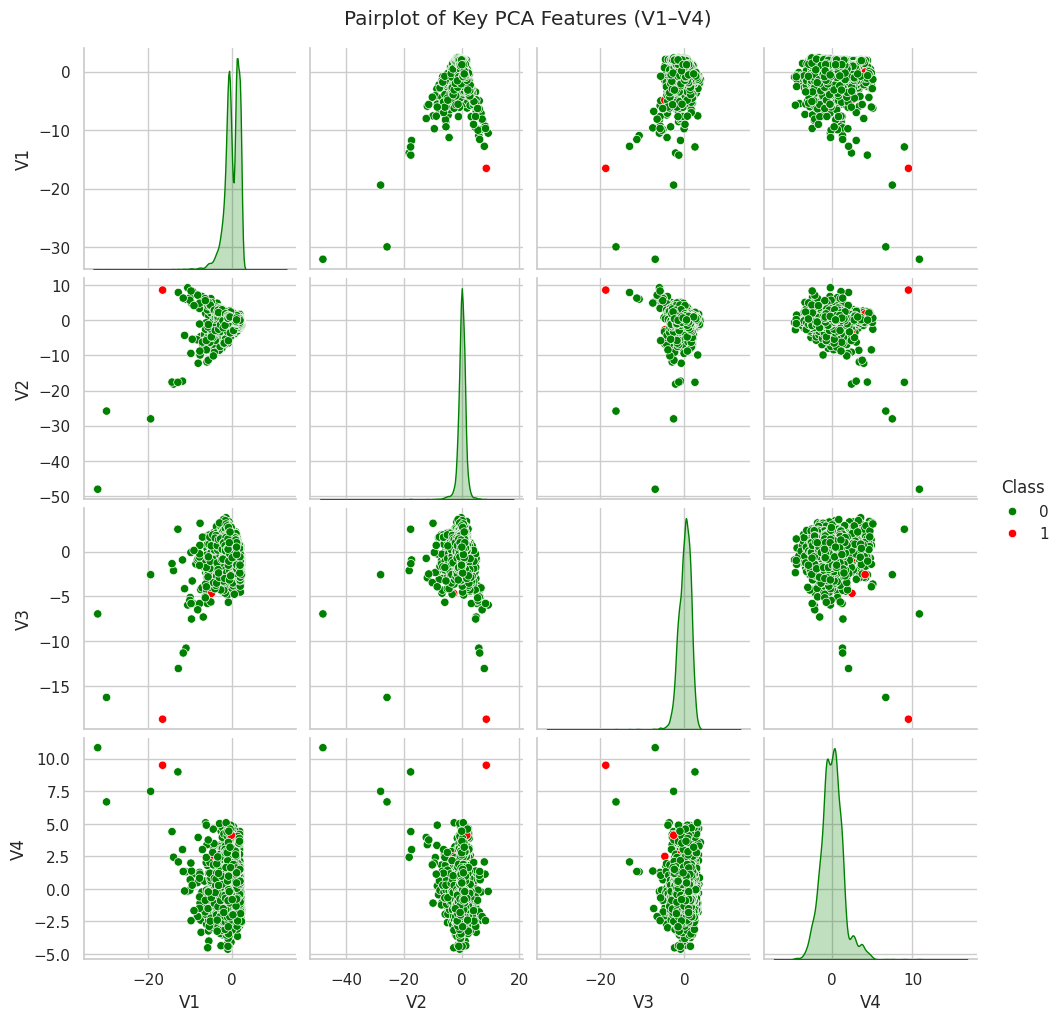

In [14]:
sample_data = data.sample(5000, random_state=42)  # take smaller sample for speed
sns.pairplot(sample_data, vars=['V1','V2','V3','V4'], hue='Class', diag_kind='kde', palette={0:'green',1:'red'})
plt.suptitle("Pairplot of Key PCA Features (V1–V4)", y=1.02)
plt.show()

# Boxplots for Highly Correlated Features

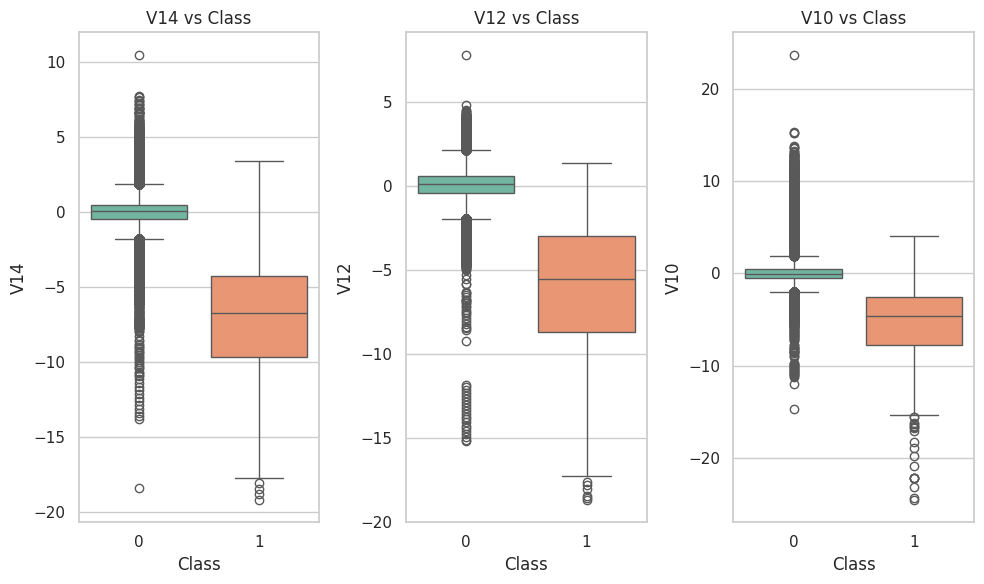

In [15]:
top_features = ['V14', 'V12', 'V10']  # often highly correlated with fraud
plt.figure(figsize=(10,6))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Class', y=feature, data=data, palette="Set2")
    plt.title(f"{feature} vs Class")
plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Take 350 Fraud + 350 Non-Fraud Transactions

In [17]:
fraud_df = data[data['Class'] == 1].sample(n=350, random_state=42)
non_fraud_df = data[data['Class'] == 0].sample(n=350, random_state=42)
balanced_df = pd.concat([fraud_df, non_fraud_df]).sample(frac=1, random_state=42)

print("\nBalanced dataset shape:", balanced_df.shape)
print(balanced_df['Class'].value_counts())



Balanced dataset shape: (700, 31)
Class
1    350
0    350
Name: count, dtype: int64


# Check correlation between V1–V28 and Class

In [18]:
corr = balanced_df.corr()['Class'][1:29]  # V1–V28 columns
print("\nCorrelation with Class:\n", corr)

# Drop columns with near-zero correlation
corr_threshold = 0.05  # you can adjust this
drop_features = corr[abs(corr) < corr_threshold].index
print("\nDropping low-correlation features:", list(drop_features))
balanced_df = balanced_df.drop(columns=drop_features)


Correlation with Class:
 V1    -0.430005
V2     0.481374
V3    -0.559514
V4     0.718607
V5    -0.375378
V6    -0.381133
V7    -0.469600
V8     0.060085
V9    -0.554537
V10   -0.621541
V11    0.679837
V12   -0.678522
V13   -0.078993
V14   -0.740443
V15   -0.048796
V16   -0.598453
V17   -0.555676
V18   -0.464372
V19    0.275213
V20    0.158563
V21    0.137915
V22    0.006875
V23   -0.032072
V24   -0.097708
V25    0.016052
V26    0.105310
V27    0.098469
V28    0.144125
Name: Class, dtype: float64

Dropping low-correlation features: ['V15', 'V22', 'V23', 'V25']


In [19]:
non_fraud_imb = data[data['Class'] == 0].sample(3000, random_state=42)
fraud_imb = data[data['Class'] == 1].sample(350, random_state=42)
df_imb = pd.concat([non_fraud_imb, fraud_imb]).sample(frac=1, random_state=42)

def feature_select(df):
    corr = df.corr()['Class'][1:]
    drop_features = corr[abs(corr) < 0.05].index
    return df.drop(columns=drop_features)

df_imb = feature_select(df_imb)
balanced_df = feature_select(balanced_df)

# Split features and target

In [20]:
# SPLIT DATASETS

# ---------------- IMBALANCED ----------------
X_imp = df_imb.drop("Class", axis=1)
y_imp = df_imb["Class"]
X_imp = StandardScaler().fit_transform(X_imp)
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split(
    X_imp, y_imp, test_size=0.3, random_state=42, stratify=y_imp)

In [21]:

# ---------------- BALANCED ----------------
X_bal = balanced_df.drop("Class", axis=1)
y_bal = balanced_df["Class"]
X_bal = StandardScaler().fit_transform(X_bal)


# Train-Test Split

In [22]:
m = SMOTE(random_state=42)
X_bal_res, y_bal_res = m.fit_resample(X_bal, y_bal)

X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(
    X_bal_res, y_bal_res, test_size=0.3, random_state=42, stratify=y_bal_res)

In [23]:

# Neural Network (Adam Optimizer without SciKeras GridSearch)

def build_model(optimizer, input_dim):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model




In [24]:

# Neural Network WITHOUT Optimizer (Default SGD)

model_no_opt = build_model(SGD(), X_imp_train.shape[1])

history_no_opt = model_no_opt.fit(
    X_imp_train, y_imp_train, epochs=15, batch_size=32,
    validation_split=0.2, verbose=0)

y_pred_no_opt = (model_no_opt.predict(X_imp_test) > 0.5).astype("int32")

no_opt_acc = accuracy_score(y_imp_test, y_pred_no_opt)
no_opt_precision = precision_score(y_imp_test, y_pred_no_opt)

# Recall
no_opt_recall = recall_score(y_imp_test, y_pred_no_opt)

# F1 Score
no_opt_f1 = f1_score(y_imp_test, y_pred_no_opt)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [25]:

#  Neural Network WITH ADAM OPTIMIZER


model_adam = build_model(Adam(learning_rate=0.001), X_imp_train.shape[1])

history_adam = model_adam.fit(
    X_imp_train, y_imp_train, epochs=15, batch_size=32,
    validation_split=0.2, verbose=0)

y_pred_adam = (model_adam.predict(X_imp_test) > 0.5).astype("int32")

nn_acc = accuracy_score(y_imp_test, y_pred_adam)
nn_precision = precision_score(y_imp_test, y_pred_adam)

# Recall
nn_recall = recall_score(y_imp_test, y_pred_adam)

# F1 Score
nn_f1 = f1_score(y_imp_test, y_pred_adam)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [26]:

# SAME MODEL WITH IMBALANCED VS BALANCED (SMOTE)

# Use Adam optimizer for both to show SMOTE improvement
model_imp = build_model(Adam(0.001), X_imp_train.shape[1])   # ← FIXED

model_imp.fit(X_imp_train, y_imp_train, epochs=15, batch_size=32, verbose=0)

pred_imp = (model_imp.predict(X_imp_test) > 0.5).astype("int32")
acc_imp = accuracy_score(y_imp_test, pred_imp)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [27]:
model_bal = build_model(Adam(0.001), X_bal_train.shape[1])
model_bal.fit(X_bal_train, y_bal_train, epochs=15, batch_size=32, verbose=0)

pred_bal = (model_bal.predict(X_bal_test) > 0.5).astype("int32")
acc_bal = accuracy_score(y_bal_test, pred_bal)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [28]:
# ============================================================
# PRINT RESULTS
# ============================================================

print("\n============================")
print(" NEURAL NETWORK COMPARISON")
print("============================")
print(f"Without Optimizer (SGD) Accuracy:   {no_opt_acc:.4f}")
print("Precision:", no_opt_precision)
print("Recall   :", no_opt_recall)
print("F1 Score :", no_opt_f1)
print(f"With Adam Optimizer Accuracy:     {nn_acc:.4f}")
print("Precision:", nn_precision)
print("Recall   :", nn_recall)
print("F1 Score :", nn_f1)



 NEURAL NETWORK COMPARISON
Without Optimizer (SGD) Accuracy:   0.9692
Precision: 1.0
Recall   : 0.7047619047619048
F1 Score : 0.8268156424581006
With Adam Optimizer Accuracy:     0.9721
Precision: 0.9873417721518988
Recall   : 0.7428571428571429
F1 Score : 0.8478260869565217


In [29]:
print("\n============================")
print(" IMBALANCED VS BALANCED DATA")
print("============================")
print(f"Imbalanced Accuracy: {acc_imp:.4f}")
print(f"Balanced (SMOTE) Accuracy: {acc_bal:.4f}")


 IMBALANCED VS BALANCED DATA
Imbalanced Accuracy: 0.9731
Balanced (SMOTE) Accuracy: 0.9238


In [32]:

#  RANDOM FOREST (GRID SEARCH TUNING)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_bal_res, y_bal_res)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_bal_test)

rf_acc = accuracy_score(y_bal_test, y_pred_rf)
rf_prec = precision_score(y_bal_test, y_pred_rf)
rf_rec = recall_score(y_bal_test, y_pred_rf)
rf_f1 = f1_score(y_bal_test, y_pred_rf)

print("\n--- Random Forest ---")
print(f"Accuracy: {rf_acc:.4f}, Precision: {rf_prec:.4f}, Recall: {rf_rec:.4f}, F1: {rf_f1:.4f}")


--- Random Forest ---
Accuracy: 0.9952, Precision: 1.0000, Recall: 0.9905, F1: 0.9952


In [33]:
from imblearn.pipeline import Pipeline as ImbPipeline


#  LOGISTIC REGRESSION


smote = SMOTE(random_state=42)

log_pipe = ImbPipeline([
    ("scaler", StandardScaler()),
    ("smote", smote),
    ("clf", LogisticRegression(max_iter=5000, class_weight="balanced"))
])

param_grid_lr = {
    "clf__C": [0.01, 0.1, 1, 10],
    "clf__solver": ["liblinear", "lbfgs"],
    "clf__class_weight": ["balanced"]

}

log_grid = GridSearchCV(
    log_pipe,
    param_grid=param_grid_lr,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

log_grid.fit(X_bal_train, y_bal_train)
best_log = log_grid.best_estimator_
y_pred_log = best_log.predict(X_bal_test)

log_acc = accuracy_score(y_bal_test, y_pred_log)
log_prec = precision_score(y_bal_test, y_pred_log)
log_rec = recall_score(y_bal_test, y_pred_log)
log_f1 = f1_score(y_bal_test, y_pred_log)

print("\n--- Tuned Logistic Regression ---")
print("Best Params:", log_grid.best_params_)
print(f"Accuracy : {log_acc:.4f}")
print(f"Precision: {log_prec:.4f}")
print(f"Recall   : {log_rec:.4f}")
print(f"F1 Score : {log_f1:.4f}")


--- Tuned Logistic Regression ---
Best Params: {'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__solver': 'lbfgs'}
Accuracy : 0.9286
Precision: 0.9787
Recall   : 0.8762
F1 Score : 0.9246


In [34]:

#  SUPPORT VECTOR MACHINE

svm_pipe = ImbPipeline([
    ("scaler", StandardScaler()),
    ("smote", smote),
    ("clf", SVC(probability=True, class_weight="balanced"))
])

svm_param_grid = {
    "clf__C": [0.1, 1, 10],
    "clf__kernel": ["linear", "rbf"],
    "clf__gamma": ["scale", "auto"]
}

svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=svm_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

svm_grid.fit(X_bal_train, y_bal_train)
best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_bal_test)

svm_acc = accuracy_score(y_bal_test, y_pred_svm)
svm_prec = precision_score(y_bal_test, y_pred_svm)
svm_rec = recall_score(y_bal_test, y_pred_svm)
svm_f1 = f1_score(y_bal_test, y_pred_svm)

print("\n--- Tuned SVM ---")
print("Best Params:", svm_grid.best_params_)
print(f"Accuracy : {svm_acc:.4f}")
print(f"Precision: {svm_prec:.4f}")
print(f"Recall   : {svm_rec:.4f}")
print(f"F1 Score : {svm_f1:.4f}")


--- Tuned SVM ---
Best Params: {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}
Accuracy : 0.9429
Precision: 0.9895
Recall   : 0.8952
F1 Score : 0.9400


In [35]:

# MODEL COMPARISON AND VISUALIZATION

results = pd.DataFrame({
    'Model': ['Neural Network (Adam)', 'Random Forest', 'Logistic Regression', 'SVM'],
    'Accuracy': [nn_acc, rf_acc, log_acc, svm_acc],
    'Precision': [nn_precision, rf_prec, log_prec, svm_prec],
    'Recall': [nn_recall, rf_rec, log_rec, svm_rec],
    'F1 Score': [nn_f1, rf_f1, log_f1, svm_f1]
})
print("\nModel Comparison:\n", results)


Model Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score
0  Neural Network (Adam)  0.972139   0.987342  0.742857  0.847826
1          Random Forest  0.995238   1.000000  0.990476  0.995215
2    Logistic Regression  0.928571   0.978723  0.876190  0.924623
3                    SVM  0.942857   0.989474  0.895238  0.940000


In [36]:
# MODEL COMPARISON AND VISUALIZATION

results = pd.DataFrame({
    'Model': ['Neural Network (Adam)', 'Random Forest', 'Logistic Regression', 'SVM'],
    'Accuracy': [nn_acc, rf_acc, log_acc, svm_acc],
    'Precision': [nn_precision, rf_prec, log_prec, svm_prec],
    'Recall': [nn_recall, rf_rec, log_rec, svm_rec],
    'F1 Score': [nn_f1, rf_f1, log_f1, svm_f1]
})
print("\nModel Comparison:\n", results)


Model Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score
0  Neural Network (Adam)  0.972139   0.987342  0.742857  0.847826
1          Random Forest  0.995238   1.000000  0.990476  0.995215
2    Logistic Regression  0.928571   0.978723  0.876190  0.924623
3                    SVM  0.942857   0.989474  0.895238  0.940000


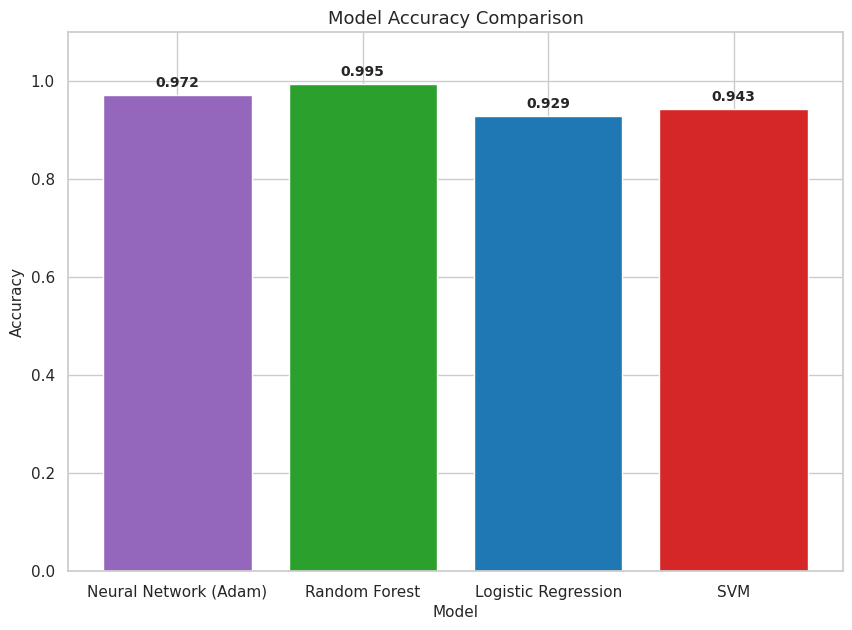

In [37]:
# Plot Accuracy Comparison
plt.figure(figsize=(10,7))
colors = ['#9467bd', '#2ca02c', '#1f77b4', '#d62728']
bars = plt.bar(results['Model'], results['Accuracy'], color=colors)
plt.title('Model Accuracy Comparison', fontsize=13)
plt.xlabel('Model', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.ylim(0, 1.1)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.01, f"{bar.get_height():.3f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()